In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from dogcat_data import generators, get_nb_files
import matplotlib.pyplot as plt

top_model_weights_path = 'bottleneck_fc_model.h5'
train_dir = 'dogcat-data/train'
validation_dir = 'dogcat-data/validation'
nb_train_samples = 1000
nb_validation_samples = 1000

Using TensorFlow backend.


Found 1800 images belonging to 2 classes.


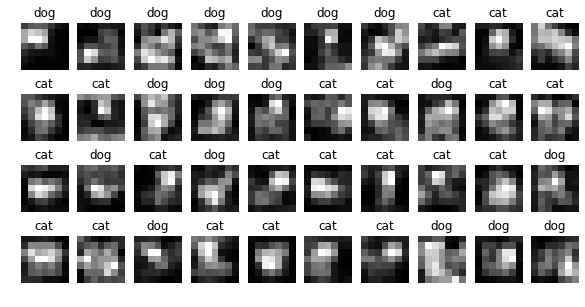

In [29]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# build the VGG16 network
model = VGG16(include_top=False, weights='imagenet')
generator = datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=40,
        class_mode='binary')
images, labels = next(generator)
features = model.predict(images)
plt.rcParams['figure.figsize'] = (10,5)
for i in range(40):
    feature = np.sum(features[i], 2)
    feature *= 255.0 / feature.max()
    plt.subplot(4,10,i+1)
    plt.imshow(feature, cmap='gray',)
    plt.title("cat" if labels[i] else "dog")
    plt.axis('off')